In [7]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import csv
import os
import sys

In [8]:
data_dir = './data'

student_log_paths = [os.path.join(data_dir, f) for f in os.listdir(data_dir) if f.startswith('student_log')]
training_label_path = os.path.join(data_dir, 'training_label.csv')
validation_test_label = os.path.join(data_dir, 'validation_test_label.csv')

dfs = []
for path in student_log_paths:
    temp = pd.read_csv(path)
    dfs.append(temp)
student_df = pd.concat(dfs)

training_label_df = pd.read_csv(training_label_path)
validation_test_label_df = pd.read_csv(validation_test_label)

/Users/ckyeungac/anaconda/envs/dlenv/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (74,75) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [9]:
print("student_df.shape:", student_df.shape) 
print("training_label_df.shape:", training_label_df.shape)
print("validation_test_label_df.shape:", validation_test_label_df.shape)

student_df.shape: (942816, 77)
training_label_df.shape: (514, 5)
validation_test_label_df.shape: (172, 4)


In [10]:
len(set(training_label_df.ITEST_id).intersection(set(validation_test_label_df.ITEST_id)))

48

In [11]:
student_df.head()

,AveCarelessness,AveCorrect,AveKnow,AveResBored,AveResConf,AveResEngcon,AveResFrust,AveResGaming,AveResOfftask,ITEST_id,...,timeOver80,timeSinceSkill,timeTaken,totalFrAttempted,totalFrPastWrongCount,totalFrPercentPastWrong,totalFrSkillOpportunities,totalFrSkillOpportunitiesByScaffolding,totalFrTimeOnSkill,totalTimeByPercentCorrectForskill
0,0.087241,0.240964,0.143160,0.230236,0.143135,0.615039,0.213469,0.184285,0.138763,5460,...,0,0.0,17.0,217,1,0.500000,2,2.0,46.0,1187.999999
1,0.087241,0.240964,0.143160,0.230236,0.143135,0.615039,0.213469,0.184285,0.138763,5460,...,0,0.0,16.0,218,1,0.333333,3,1.5,63.0,1356.333332
2,0.167368,0.461538,0.299335,0.236641,0.052729,0.671121,0.106296,0.069549,0.167344,5468,...,0,0.0,41.0,0,0,0.000000,0,0.0,0.0,0.000000
3,0.167368,0.461538,0.299335,0.236641,0.052729,0.671121,0.106296,0.069549,0.167344,5468,...,0,0.0,53.0,1,1,1.000000,1,0.0,41.0,0.000000
4,0.167368,0.461538,0.299335,0.236641,0.052729,0.671121,0.106296,0.069549,0.167344,5468,...,0,0.0,27.0,2,1,1.000000,2,0.0,41.0,0.000000


In [12]:
student_df.columns

Index(['AveCarelessness', 'AveCorrect', 'AveKnow', 'AveResBored', 'AveResConf',
       'AveResEngcon', 'AveResFrust', 'AveResGaming', 'AveResOfftask',
       'ITEST_id', 'Ln', 'Ln-1', 'NumActions', 'Prev5count', 'RES_BORED',
       'RES_CONCENTRATING', 'RES_CONFUSED', 'RES_FRUSTRATED', 'RES_GAMING',
       'RES_OFFTASK', 'SY ASSISTments Usage', 'actionId', 'assignmentId',
       'assistmentId', 'attemptCount', 'bottomHint', 'confidence(BORED)',
       'confidence(CONCENTRATING)', 'confidence(CONFUSED)',
       'confidence(FRUSTRATED)', 'confidence(GAMING)', 'confidence(OFF TASK)',
       'consecutiveErrorsInRow', 'correct', 'endTime',
       'endsWithAutoScaffolding', 'endsWithScaffolding', 'frIsHelpRequest',
       'frIsHelpRequestScaffolding', 'frPast5HelpRequest', 'frPast5WrongCount',
       'frPast8HelpRequest', 'frPast8WrongCount', 'frTimeTakenOnScaffolding',
       'frTotalSkillOpportunitiesScaffolding', 'frWorkingInSchool',
       'helpAccessUnder2Sec', 'hint', 'hintCount', 'hin

In [13]:
len(student_df.ITEST_id.unique())

1709

In [14]:
skill = student_df.skill.unique()
skill_id = range(len(skill))
skill_id_map = dict(zip(skill, skill_id))

In [15]:
len(skill)

102

In [16]:
dkt_df = student_df[['ITEST_id', 'correct', 'skill', 'actionId']]
dkt_df['skill_id'] = dkt_df['skill'].apply(lambda x: skill_id_map[x])
dkt_df['user_id'] = dkt_df['ITEST_id']
dkt_df['time_idx'] = dkt_df['actionId']
sorted_data = dkt_df.sort_values('time_idx')
sorted_data.head()

/Users/ckyeungac/anaconda/envs/dlenv/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/ckyeungac/anaconda/envs/dlenv/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/ckyeungac/anaconda/envs/dlenv/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

,ITEST_id,correct,skill,actionId,skill_id,user_id,time_idx
0,8,0,properties-of-geometric-figures,9950,10,8,9950
1,8,1,properties-of-geometric-figures,9951,10,8,9951
2,8,0,sum-of-interior-angles-more-than-3-sides,9952,11,8,9952
3,8,0,sum-of-interior-angles-more-than-3-sides,9953,11,8,9953
4,8,1,sum-of-interior-angles-more-than-3-sides,9954,11,8,9954


# Prepare data to train DKT model (already done)

In [20]:
REQUIRE_COLS = ['time_idx', 'user_id', 'skill_id', 'correct']
user_ids = dkt_df.user_id.unique()
tuples = []
for id in user_ids:
    df = sorted_data[sorted_data.user_id == id]
    df = df[REQUIRE_COLS]
    problems = [int(pid) for pid in df.skill_id]
    corrects = [int(corr) for corr in df.correct]
    num_problems = len(problems)
#     print (num_problems)
#     print (problems)
#     print (corrects)
#     print ("============")
    result = (num_problems, problems, corrects)
    tuples.append(result)

In [21]:
train, test = train_test_split(tuples, test_size=0.2)

In [22]:
if False:
    with open('./data/assistment_challenge/assistment_challenge_train.csv', 'w') as f:
        writer = csv.writer(f, 
                            delimiter=',', 
                            quotechar="'", 
                            quoting=csv.QUOTE_MINIMAL,
                            lineterminator='\n')
        for tup in train:
            writer.writerow([tup[0]])
            writer.writerow(tup[1])
            writer.writerow([int(i) for i in tup[2]])
            
    with open('./data/assistment_challenge/assistment_challenge_test.csv', 'w') as f:
        writer = csv.writer(f, 
                            delimiter=',', 
                            quotechar="'", 
                            quoting=csv.QUOTE_MINIMAL,
                            lineterminator='\n')
        for tup in test:
            writer.writerow([tup[0]])
            writer.writerow(tup[1])
            writer.writerow([int(i) for i in tup[2]])

In [23]:
student_specific_columns = ["AveKnow",
                            "AveCarelessness",
                            "AveCorrect",
                            "NumActions",
                            "AveResBored",
                            "AveResEngcon",
                            "AveResConf",
                            "AveResFrust",
                            "AveResOfftask",
                            "AveResGaming"]

In [24]:
required_cols = ['ITEST_id'] + student_specific_columns
student_specific_df = student_df[required_cols].drop_duplicates()

In [25]:
student_specific_df.head()

,ITEST_id,AveKnow,AveCarelessness,AveCorrect,NumActions,AveResBored,AveResEngcon,AveResConf,AveResFrust,AveResOfftask,AveResGaming
0,5460,0.143160,0.087241,0.240964,498,0.230236,0.615039,0.143135,0.213469,0.138763,0.184285
2,5468,0.299335,0.167368,0.461538,845,0.236641,0.671121,0.052729,0.106296,0.167344,0.069549
847,5469,0.133419,0.086867,0.291613,775,0.255888,0.583353,0.091443,0.139030,0.167719,0.117995
1622,5471,0.099232,0.055996,0.265684,2375,0.202724,0.683841,0.083781,0.127172,0.104585,0.325994
3997,5482,0.137267,0.083511,0.315697,567,0.257620,0.626597,0.120071,0.138302,0.168870,0.066309


In [26]:
training_label_df.head()

,ITEST_id,SchoolId,AveCorrect,MCAS,isSTEM
0,9,2,0.438492,32,1
1,27,1,0.348837,21,0
2,33,2,0.686391,52,0
3,35,2,0.379658,34,0
4,37,3,0.305785,-999,0


In [27]:
# combined_df = pd.merge(left=training_label_df, right=student_specific_df, how='left', left_on='ITEST_id', right_on='ITEST_id')
combined_df_train = training_label_df.merge(student_specific_df, left_on='ITEST_id', right_on='ITEST_id', how='left')
combined_df_train['AveCorrect'] = combined_df_train['AveCorrect_x']
del combined_df_train['AveCorrect_x']
del combined_df_train['AveCorrect_y']
X = combined_df_train[student_specific_columns].values
y = combined_df_train['isSTEM'].values

In [28]:
combined_df_test = pd.merge(left=validation_test_label_df, right=student_specific_df, how='left')
X_target = combined_df_test[student_specific_columns].values

In [29]:
X.shape

(514, 10)

In [30]:
combined_df_train.head()

,ITEST_id,SchoolId,MCAS,isSTEM,AveKnow,AveCarelessness,NumActions,AveResBored,AveResEngcon,AveResConf,AveResFrust,AveResOfftask,AveResGaming,AveCorrect
0,9,2,32,1,0.185138,0.099734,504,0.277149,0.644744,0.098078,0.162771,0.213378,0.005554,0.438492
1,27,1,21,0,0.142031,0.069297,129,0.330226,0.551367,0.122658,0.095420,0.348090,0.036900,0.348837
2,33,2,52,0,0.459813,0.202787,169,0.260426,0.650769,0.059971,0.061834,0.296286,0.010954,0.686391
3,35,2,34,0,0.255164,0.158848,993,0.222796,0.650079,0.069987,0.164347,0.153147,0.236800,0.379658
4,37,3,-999,0,0.071909,0.046183,121,0.326384,0.653445,0.125325,0.094714,0.451467,0.016241,0.305785


# Import model of DKT
If you want to change the model with different regularization parameters
Simply change
```python
network_config['lambda_o']
network_config['lambda_w1']
network_config['lambda_w2']
```
to the desired value

---
To use the original DKT model without any regularization:
```python
network_config['lambda_o'] = 0.0
network_config['lambda_w1'] = 0.0
network_config['lambda_w2'] = 0.0
```

To use the original DKT model with regularization:
```python
network_config['lambda_o'] = 0.1
network_config['lambda_w1'] = 0.3
network_config['lambda_w2'] = 3.0
```

In [ ]:
import os
import tensorflow as tf
import numpy as np
from utils import DKT
from load_data import DKTData

In [ ]:
train_path = './data/assistment_challenge/assistment_challenge_train.csv'
test_path = './data/assistment_challenge/assistment_challenge_test.csv'
save_dir_prefix = './dkt_models/assistment_challenge/'

In [ ]:
rnn_cells = {
    "LSTM": tf.contrib.rnn.LSTMCell,
    "GRU": tf.contrib.rnn.GRUCell,
    "BasicRNN": tf.contrib.rnn.BasicRNNCell,
    "LayerNormBasicLSTM": tf.contrib.rnn.LayerNormBasicLSTMCell,
}

# train_path = os.path.join('./data/', 'skill_id_train.csv')
# test_path = os.path.join('./data/', 'skill_id_test.csv')

network_config = {}
network_config['batch_size'] = 32
network_config['hidden_layer_structure'] = [200]
network_config['learning_rate'] = 0.01
network_config['keep_prob'] = 0.333
network_config['rnn_cell'] = rnn_cells["LSTM"]


use_dktp = True

if use_dktp:
    network_config['lambda_o'] = 0.1
    network_config['lambda_w1'] = 0.3
    network_config['lambda_w2'] = 3.0
else:
    network_config['lambda_o'] = 0.0
    network_config['lambda_w1'] = 0.0
    network_config['lambda_w2'] = 0.0


num_runs = 1
num_epochs = 1
batch_size = 32
keep_prob = 0.333

In [ ]:
tf.reset_default_graph()

In [ ]:
sess = tf.Session()

data = DKTData(train_path, test_path, batch_size=batch_size)
data_train = data.train
data_test = data.test
num_problems = data.num_problems

dkt = DKT(sess, data_train, data_test, num_problems, network_config,
          num_runs=num_runs, num_epochs=num_epochs,
          save_dir_prefix=save_dir_prefix,
          keep_prob=keep_prob, logging=False, save=False)

# load the model
dkt.model.build_graph()
dkt.load_model()

In [ ]:
# dkt
_evaluation = False
if _evaluation:
    auc_n, auc_c, entropy_loss = dkt.evaluate()
    print('auc_n:', auc_n)
    print('auc_c:', auc_c)
    
    w1, w2 = dkt.waviness()
    print('w1:', w1)
    print('w2:', w2)
    
    m1, m2 = dkt.consistency()
    print('m1:', m1)
    print('m2:', m2)

In [ ]:
# dkt+
_evaluation = False
if _evaluation:
    auc_n, auc_c, entropy_loss = dkt.evaluate()
    print('auc_n:', auc_n)
    print('auc_c:', auc_c)
    
    w1, w2 = dkt.waviness()
    print('w1:', w1)
    print('w2:', w2)
    
    m1, m2 = dkt.consistency()
    print('m1:', m1)
    print('m2:', m2)

# Obtain student's DKT feature

In [31]:
import os
use_dktp=True
if use_dktp:
    students_knowledge_states_path = './data/students_knowledge_states_dktp.csv'
else:
    students_knowledge_states_path = './data/students_knowledge_states_dkt.csv'
    
if os.path.exists(students_knowledge_states_path):
    students_dk_df = pd.read_csv(students_knowledge_states_path)
    print('students_dk_df is read from', students_knowledge_states_path)
else:
    REQUIRE_COLS = ['time_idx', 'user_id', 'skill_id', 'correct']
    user_ids = list(set(list(combined_df_train.ITEST_id.unique()) + list(combined_df_test.ITEST_id.unique())))
    # kt_columns_name = ['kt_{}'.format(i) for i in range(102)]
    kt_columns_name = skill_df.skill.values
    columns_name = kt_columns_name + ['ITEST_id']
    knowledge_states = []

    for i, id in enumerate(user_ids):
        if i % 10 == 0:
            print(i, id, end='\r')

        df = sorted_data[sorted_data.user_id == id]
        df = df[REQUIRE_COLS]
        problems = [int(pid) for pid in df.skill_id]
        corrects = [int(corr) for corr in df.correct]
        num_problems = len(problems)

        # the student knowledge state in the last output
        skt = dkt.get_output_layer([problems], [corrects])[0][-1]

        knowledge_state = dict(zip(kt_columns_name, skt))
        knowledge_state['ITEST_id'] = id
        knowledge_states.append(knowledge_state)

    students_dk_df = pd.DataFrame(knowledge_states)    
    students_dk_df['ITEST_id'] = students_dk_df['ITEST_id'].apply(int)
    
    students_dk_df.to_csv(students_knowledge_states_path, header='True', index=False)

students_dk_df is read from ./data/students_knowledge_states_dktp.csv


In [32]:
combined_df = pd.merge(left=student_specific_df, right=students_dk_df, how='left')
train_df = training_label_df.merge(combined_df, left_on='ITEST_id', right_on='ITEST_id', how='left')
test_df = validation_test_label_df.merge(combined_df, left_on='ITEST_id', right_on='ITEST_id', how='left')

# remove duplicated features
train_df['AveCorrect'] = train_df['AveCorrect_x']
del train_df['AveCorrect_x']
del train_df['AveCorrect_y']
test_df['AveCorrect'] = test_df['AveCorrect_x']
del test_df['AveCorrect_x']
del test_df['AveCorrect_y']

# prepare dataset
X_train_all = train_df[features_cols].values
y_train_all = train_df['isSTEM'].values
X_test_all = test_df[features_cols].values

features_cols = list(train_df.columns.drop(['ITEST_id', 'isSTEM']))
X_train_all = train_df[features_cols].values
y_train_all = train_df['isSTEM'].values
X_test_all = test_df[features_cols].values

# Training the static machine learning model

In [ ]:
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit, GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import auc, roc_curve, mean_squared_error, make_scorer, precision_recall_curve

In [ ]:
# prepare the train data and test data
cv = StratifiedShuffleSplit(n_splits=5, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X_train_all, y_train_all, test_size=0.2)

In [ ]:
lr_param_grid = {
    'penalty': ['l1', 'l2']
}

In [ ]:
svm_param_grid = {
    'C': [0.001, 0.003, 0.01, 0.03, 0.1, 0.3, 1.0, 3.0, 10.0, 30.0, 100.0], 
    'gamma': [0.001, 0.003, 0.01, 0.03, 0.1, 0.3, 1.0, 3.0, 10.0, 30.0, 100.0], 
    'kernel': ['rbf']
}

In [ ]:
gbdt_param_grid = {
    'n_estimators': [200, 250, 300, 350, 400, 450, 500, 550], 
    'max_depth': [2, 3, 4, 5],
    'min_samples_leaf': [2, 3, 4, 5, 6, 7]
}

In [ ]:
import itertools
mlp_layer_search_list = list(itertools.product([16, 64, 128, 256]))
mlp_layer_search_list += list(itertools.product([16, 64, 128, 256], [16, 64, 128, 256]))
mlp_layer_search_list += list(itertools.product([16, 64, 128, 256], [16, 64, 128, 256], [16, 64, 128, 256]))
mlp_param_grid = {
    'hidden_layer_sizes': mlp_layer_search_list,
    'early_stopping': [True]
}

In [ ]:
def score_func_auc_rmse(y_true, y_pred):
    # auc
    fpr, tpr, thresholds = roc_curve(y_true, y_pred, pos_label=1)
    auc_ = auc(fpr, tpr)
    
    # rmse
    rmse_ = np.sqrt(mean_squared_error(y_true, y_pred))
    
    return auc_ + (1 - rmse_)

admc_scorer = make_scorer(score_func_auc_rmse, greater_is_better=True)

In [ ]:
lr_clf = GridSearchCV(estimator=LogisticRegression(),
                  param_grid=lr_param_grid,
                  scoring=admc_scorer,
                  refit = True,
                  cv=cv,
                  verbose=1,
                  # n_jobs=2,
                  return_train_score=True)
lr_clf.fit(X_train, y_train)

In [ ]:
svm_clf = GridSearchCV(estimator=SVC(),
                  param_grid=svm_param_grid,
                  scoring=admc_scorer,
                  refit = True,
                  cv=cv,
                  verbose=1,
                  # n_jobs=2,
                  return_train_score=True)
svm_clf.fit(X_train, y_train)

In [ ]:
gbdt_clf = GridSearchCV(estimator=GradientBoostingClassifier(),
                  param_grid=gbdt_param_grid,
                  scoring=admc_scorer,
                  refit = True,
                  cv=cv,
                  verbose=1,
                  # n_jobs=2,
                  return_train_score=True)
gbdt_clf.fit(X_train, y_train)

In [ ]:
mlp_clf = GridSearchCV(estimator=MLPClassifier(),
                  param_grid=mlp_param_grid,
                  scoring=admc_scorer,
                  refit = True,
                  cv=cv,
                  verbose=1,
                  # n_jobs=2,
                  return_train_score=True)
mlp_clf.fit(X_train_all, y_train_all)

In [ ]:
def print_cv_result(clf, verbose=False):
    print("Best parameters set found on development set:")
    print(clf.best_params_)
    print("with auc + rmse:", max(clf.cv_results_['mean_test_score']))
    print("test result is")
    print(clf.score(X_test, y_test))
    if verbose:
        print("Grid scores on development set:")
        print('='*50)
        means = clf.cv_results_['mean_test_score']
        stds = clf.cv_results_['std_test_score']
        for mean, std, params in zip(means, stds, clf.cv_results_['params']):
            print("%0.3f (+/-%0.03f) for %r"
                  % (mean, std * 2, params))
        print()
        
    y_pred = clf.predict(X_test)
    
    # find the auc
    fpr, tpr, thresholds = roc_curve(y_test, y_pred, pos_label=1)
    auc_ = auc(fpr, tpr)
    rmse_ = np.sqrt(mean_squared_error(y_test, y_pred))
    
    print("test AUC:", auc_)
    print("test RMSE:", rmse_)
    print("AUC + (1-RMSE):", auc_ + (1 - rmse_))

In [ ]:
print_cv_result(lr_clff)

In [ ]:
print_cv_result(svm_clf)

In [ ]:
print_cv_result(gbdt_clf)

In [ ]:
print_cv_result(mlp_clf)

In [ ]:
clf = gbdt_clf

In [ ]:
y_test_all = clf.predict_proba(X_test_all)
# prediction submit result
result = ','.join(["{:.5f}".format(i[1]) for i in y_test_all])
print(result)

# experiment

In [33]:
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit, GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import (
    accuracy_score,
    mean_squared_error,
    auc, 
    roc_curve,
    precision_recall_curve,
    recall_score,
    precision_score,
    f1_score,
)

In [96]:
svm = SVC(C=1.0, gamma=100)
svm_dkt = SVC(C=1.0, gamma=0.3)
svm_dktp = SVC(C=10.0, gamma=0.1)

gbdt = GradientBoostingClassifier(max_depth=3, min_samples_leaf=2, n_estimators=250)
gbdt_dkt = GradientBoostingClassifier(max_depth=3, min_samples_leaf=2, n_estimators=300)
gbdt_dktp = GradientBoostingClassifier(max_depth=5, min_samples_leaf=2, n_estimators=200)

lr = LogisticRegression(penalty='l1')
lr_dkt = LogisticRegression(penalty='l2')
lr_dktp = LogisticRegression(penalty='l1')

ann = MLPClassifier(hidden_layer_sizes=(64,256,64))
ann_dkt = MLPClassifier(hidden_layer_sizes=(16,128,16))
ann_dktp = MLPClassifier(hidden_layer_sizes=(64,16,16))

models_name = "svm, svm_dkt, svm_dktp, gbdt, gbdt_dkt, gbdt_dktp, lr, lr_dkt, lr_dktp, ann, ann_dkt, ann_dktp".split(', ')
models_list = [svm, svm_dkt, svm_dktp, gbdt, gbdt_dkt, gbdt_dktp, lr, lr_dkt, lr_dktp, ann, ann_dkt, ann_dktp]
models = dict(zip(models_name, models_list))

In [51]:
def prepare_dataset(use_static_only=False, use_dktp=True):
    static_columns = student_specific_columns = ["AveKnow",
                                "AveCarelessness",
                                "AveCorrect",
                                "NumActions",
                                "AveResBored",
                                "AveResEngcon",
                                "AveResConf",
                                "AveResFrust",
                                "AveResOfftask",
                                "AveResGaming"]

    kt_columns = ['kt_{}'.format(i) for i in range(102)]


    # prepare features
    features_cols = []
    target_models = []
    if use_static_only:
        features_cols = static_columns
        train_df = training_label_df.merge(student_specific_df, left_on='ITEST_id', right_on='ITEST_id', how='left')
        test_df = validation_test_label_df.merge(student_specific_df, left_on='ITEST_id', right_on='ITEST_id', how='left')
        target_models = ['lr', 'svm', 'gbdt', 'ann']
    else:
        features_cols = static_columns + kt_columns
        if use_dktp:
            students_knowledge_states_path = './data/students_knowledge_states_dktp.csv'
            target_models = ['lr_dktp', 'svm_dktp', 'gbdt_dktp', 'ann_dktp']
        else:
            students_knowledge_states_path = './data/students_knowledge_states_dkt.csv'
            target_models = ['lr_dkt', 'svm_dkt', 'gbdt_dkt', 'ann_dkt']

        students_dk_df = pd.read_csv(students_knowledge_states_path)
        combined_df = pd.merge(left=student_specific_df, right=students_dk_df, how='left')
        train_df = training_label_df.merge(combined_df, left_on='ITEST_id', right_on='ITEST_id', how='left')
        test_df = validation_test_label_df.merge(combined_df, left_on='ITEST_id', right_on='ITEST_id', how='left')

    # remove duplicated features
    train_df['AveCorrect'] = train_df['AveCorrect_x']
    del train_df['AveCorrect_x']
    del train_df['AveCorrect_y']
    test_df['AveCorrect'] = test_df['AveCorrect_x']
    del test_df['AveCorrect_x']
    del test_df['AveCorrect_y']

    # prepare dataset
    X_train_all = train_df[features_cols].values
    y_train_all = train_df['isSTEM'].values
    X_test_all = test_df[features_cols].values
    
    return X_train_all, y_train_all, target_models

In [44]:
def evaluation(y_true, y_pred):
    # return accu, auc, rmse, pr-curve
    result = dict()
    result['acc'] = accuracy_score(y_true, y_pred)
    result['precision'] = precision_score(y_true, y_pred)
    result['recall'] = recall_score(y_true, y_pred)
    result['f1'] = f1_score(y_true, y_pred
                  )
    result['rmse'] = np.sqrt(mean_squared_error(y_true, y_pred))
    fpr, tpr, thresholds = roc_curve(y_true, y_pred, pos_label=1)
    result['auc'] = auc(fpr, tpr)
    
    result['auc_and_rmse'] = result['auc'] + (1 - result['rmse'])
    
    return result

In [45]:
import pandas as pd

def experiment(model, X_train, X_test, y_train, y_test, num_epochs=5, verbose=False):
    results = []
    for i in range(num_epochs):
        model.fit(X_train, y_train)
        train_result = evaluation(y_train, model.predict(X_train))
        test_result = evaluation(y_test, model.predict(X_test))
        if verbose:
            print('Round', i)
            print('='*10, 'Train set', '='*10)
            print(train_result)
            print('='*10, 'Test set', '='*10)
            print(test_result)
        results.append(test_result)
        
    result_df = pd.DataFrame(results)
    result_mean = result_df.mean()
    result_std = result_df.std()
    result_summary = pd.concat([result_mean, result_std], axis=1)
    result_summary.columns = ['mean', 'std']
    print('Result:')
    print(result_summary)
    
    return results

def cross_validation(model, X, y, num_folds=5, verbose=False):
    results = []
    
    cv = StratifiedShuffleSplit(n_splits=num_folds, random_state=42)
    for train_idx, test_idx in cv.split(X, y):
        X_train = X[train_idx]
        y_train = y[train_idx]
        X_test = X[test_idx]
        y_test = y[test_idx]
        
        model.fit(X_train, y_train)
        train_result = evaluation(y_train, model.predict(X_train))
        test_result = evaluation(y_test, model.predict(X_test))
        
        if verbose:
            print('Round', i)
            print('='*10, 'Train set', '='*10)
            print(train_result)
            print('='*10, 'Test set', '='*10)
            print(test_result)
        results.append(test_result)
        
    result_df = pd.DataFrame(results)
    result_mean = result_df.mean()
    result_std = result_df.std()
    result_summary = pd.concat([result_mean, result_std], axis=1)
    result_summary.columns = ['mean', 'std']
    print('Result:')
    print(result_summary)
    
    return results

In [97]:
use_static_only = True
use_dktp = False

X, y, target_models = prepare_dataset(use_static_only, use_dktp)

for model_name in target_models:
    print(model_name)
    model = models[model_name]
    cross_validation(model, X, y, verbose=False)
    print('='*30)

lr
Result:
                  mean       std
acc           0.688462  0.036991
auc           0.547731  0.032910
auc_and_rmse  0.990350  0.065445
f1            0.229529  0.054341
precision     0.686667  0.301478
recall        0.141176  0.032219
rmse          0.557381  0.032887
svm
Result:
                  mean       std
acc           0.865385  0.023553
auc           0.797143  0.036652
auc_and_rmse  1.431473  0.069828
f1            0.742313  0.055993
precision     0.983333  0.037268
recall        0.600000  0.076696
rmse          0.365670  0.033555
gbdt
Result:
                  mean       std
acc           0.776923  0.063199
auc           0.740504  0.062712
auc_and_rmse  1.272032  0.129213
f1            0.652497  0.086549
precision     0.675357  0.112998
recall        0.635294  0.076696
rmse          0.468473  0.067179
ann


/Users/ckyeungac/anaconda/envs/dlenv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 due to no predicted samples.

/Users/ckyeungac/anaconda/envs/dlenv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning:

F-score is ill-defined and being set to 0.0 due to no predicted samples.



Result:
                  mean       std
acc           0.534615  0.189596
auc           0.493950  0.013529
auc_and_rmse  0.822721  0.144866
f1            0.190858  0.261577
precision     0.127885  0.175187
recall        0.376471  0.517179
rmse          0.671228  0.136186


In [98]:
use_static_only = False
use_dktp = False

X, y, target_models = prepare_dataset(use_static_only, use_dktp)

for model_name in target_models:
    print(model_name)
    model = models[model_name]
    cross_validation(model, X, y, verbose=False)
    print('='*30)

lr_dkt
Result:
                  mean       std
acc           0.726923  0.025074
auc           0.600504  0.038116
auc_and_rmse  1.078372  0.061210
f1            0.354645  0.095635
precision     0.786667  0.145964
recall        0.235294  0.083189
rmse          0.522132  0.023846
svm_dkt
Result:
                  mean       std
acc           0.776923  0.039878
auc           0.683025  0.051362
auc_and_rmse  1.212133  0.091563
f1            0.543688  0.095040
precision     0.821970  0.138688
recall        0.411765  0.093008
rmse          0.470892  0.040886
gbdt_dkt
Result:
                  mean       std
acc           0.776923  0.061718
auc           0.740504  0.067821
auc_and_rmse  1.271836  0.132833
f1            0.650636  0.091490
precision     0.670109  0.095867
recall        0.635294  0.096657
rmse          0.468668  0.065449
ann_dkt


/Users/ckyeungac/anaconda/envs/dlenv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 due to no predicted samples.

/Users/ckyeungac/anaconda/envs/dlenv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning:

F-score is ill-defined and being set to 0.0 due to no predicted samples.



Result:
                  mean       std
acc           0.603846  0.154805
auc           0.500000  0.000000
auc_and_rmse  0.878500  0.111196
f1            0.098551  0.220366
precision     0.065385  0.146204
recall        0.200000  0.447214
rmse          0.621500  0.111196


In [99]:
use_static_only = False
use_dktp = True

X, y, target_models = prepare_dataset(use_static_only, use_dktp)

for model_name in target_models:
    print(model_name)
    model = models[model_name]
    cross_validation(model, X, y, verbose=False)
    print('='*30)

lr_dktp
Result:
                  mean       std
acc           0.688462  0.016090
auc           0.556807  0.028464
auc_and_rmse  0.998801  0.041921
f1            0.264004  0.096329
precision     0.567619  0.070743
recall        0.176471  0.072044
rmse          0.558006  0.014478
svm_dktp
Result:
                  mean       std
acc           0.765385  0.028524
auc           0.741008  0.041135
auc_and_rmse  1.257374  0.065067
f1            0.647619  0.057942
precision     0.642584  0.062741
recall        0.670588  0.121979
rmse          0.483634  0.029855
gbdt_dktp
Result:
                  mean       std
acc           0.796154  0.057048
auc           0.757815  0.050582
auc_and_rmse  1.310334  0.117517
f1            0.678056  0.074809
precision     0.717905  0.127664
recall        0.647059  0.041595
rmse          0.447481  0.067148
ann_dktp
Result:
                  mean       std
acc           0.615385  0.086003
auc           0.499496  0.006868
auc_and_rmse  0.882229  0.065499
f1      

/Users/ckyeungac/anaconda/envs/dlenv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 due to no predicted samples.

/Users/ckyeungac/anaconda/envs/dlenv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning:

F-score is ill-defined and being set to 0.0 due to no predicted samples.



In [ ]:
use_static_only = True
use_dktp = False

X_train, X_test, y_train, y_test, target_models = prepare_dataset(use_static_only, use_dktp)

for model_name in target_models:
    print(model_name)
    model = models[model_name]
    experiment(model, X_train, X_test, y_train, y_test, num_epochs=5, verbose=False)
    print()

In [ ]:
use_static_only = False
use_dktp = False

X_train, X_test, y_train, y_test, target_models = prepare_dataset(use_static_only, use_dktp)

for model_name in target_models:
    print(model_name)
    model = models[model_name]
    experiment(model, X_train, X_test, y_train, y_test, num_epochs=5, verbose=False)
    print()

In [ ]:
use_static_only = False
use_dktp = True

X_train, X_test, y_train, y_test, target_models = prepare_dataset(use_static_only, use_dktp)

for model_name in target_models:
    print(model_name)
    model = models[model_name]
    experiment(model, X_train, X_test, y_train, y_test, num_epochs=5, verbose=False)
    print()

In [ ]:
X_test.shape

In [ ]:
sum(training_label_df['isSTEM'] == 0)

# Correlation

In [58]:
skill_df = dkt_df[['skill', 'skill_id']].drop_duplicates()
skill_dict = dict(zip(skill_df.skill_id, skill_df.skill))
skill2id = dict(zip(skill_df.skill, skill_df.skill_id))

In [64]:
use_static_only = False
use_dktp = True

static_columns = student_specific_columns = ["AveKnow",
                            "AveCarelessness",
                            "AveCorrect",
                            "NumActions",
                            "AveResBored",
                            "AveResEngcon",
                            "AveResConf",
                            "AveResFrust",
                            "AveResOfftask",
                            "AveResGaming"]

# kt_columns = ['kt_{}'.format(i) for i in range(102)]
kt_columns = skill_df.skill.values

# prepare features
features_cols = []
target_models = []
if use_static_only:
    features_cols = static_columns
    train_df = training_label_df.merge(student_specific_df, left_on='ITEST_id', right_on='ITEST_id', how='left')
    test_df = validation_test_label_df.merge(student_specific_df, left_on='ITEST_id', right_on='ITEST_id', how='left')
    target_models = ['lr', 'svm', 'gbdt', 'ann']
else:
    features_cols = list(static_columns) + list(kt_columns)
    if use_dktp:
        students_knowledge_states_path = './data/students_knowledge_states_dktp.csv'
        target_models = ['lr_dktp', 'svm_dktp', 'gbdt_dktp', 'ann_dktp']
    else:
        students_knowledge_states_path = './data/students_knowledge_states_dkt.csv'
        target_models = ['lr_dkt', 'svm_dkt', 'gbdt_dkt', 'ann_dkt']

    students_dk_df = pd.read_csv(students_knowledge_states_path)
    combined_df = pd.merge(left=student_specific_df, right=students_dk_df, how='left')
    train_df = training_label_df.merge(combined_df, left_on='ITEST_id', right_on='ITEST_id', how='left')
    test_df = validation_test_label_df.merge(combined_df, left_on='ITEST_id', right_on='ITEST_id', how='left')

# remove duplicated features
train_df['AveCorrect'] = train_df['AveCorrect_x']
del train_df['AveCorrect_x']
del train_df['AveCorrect_y']
test_df['AveCorrect'] = test_df['AveCorrect_x']
del test_df['AveCorrect_x']
del test_df['AveCorrect_y']

# rename the columns to skill name
df_columns = train_df.columns.values
for i in range(102):
    ix = np.where(df_columns == 'kt_{}'.format(i))
    df_columns[ix] = skill_dict[i]
train_df.columns = df_columns
train_df.columns

kt_columns = list(skill_df.skill.values)

columns = kt_columns + ['isSTEM']
dktp_df = train_df[columns]

In [60]:
use_static_only = False
use_dktp = False

static_columns = student_specific_columns = ["AveKnow",
                            "AveCarelessness",
                            "AveCorrect",
                            "NumActions",
                            "AveResBored",
                            "AveResEngcon",
                            "AveResConf",
                            "AveResFrust",
                            "AveResOfftask",
                            "AveResGaming"]

# kt_columns = ['kt_{}'.format(i) for i in range(102)]
kt_columns = skill_df.skill.values

# prepare features
features_cols = []
target_models = []
if use_static_only:
    features_cols = static_columns
    train_df = training_label_df.merge(student_specific_df, left_on='ITEST_id', right_on='ITEST_id', how='left')
    test_df = validation_test_label_df.merge(student_specific_df, left_on='ITEST_id', right_on='ITEST_id', how='left')
    target_models = ['lr', 'svm', 'gbdt', 'ann']
else:
    features_cols = list(static_columns) + list(kt_columns)
    if use_dktp:
        students_knowledge_states_path = './data/students_knowledge_states_dktp.csv'
        target_models = ['lr_dktp', 'svm_dktp', 'gbdt_dktp', 'ann_dktp']
    else:
        students_knowledge_states_path = './data/students_knowledge_states_dkt.csv'
        target_models = ['lr_dkt', 'svm_dkt', 'gbdt_dkt', 'ann_dkt']

    students_dk_df = pd.read_csv(students_knowledge_states_path)
    combined_df = pd.merge(left=student_specific_df, right=students_dk_df, how='left')
    train_df = training_label_df.merge(combined_df, left_on='ITEST_id', right_on='ITEST_id', how='left')
    test_df = validation_test_label_df.merge(combined_df, left_on='ITEST_id', right_on='ITEST_id', how='left')

# remove duplicated features
train_df['AveCorrect'] = train_df['AveCorrect_x']
del train_df['AveCorrect_x']
del train_df['AveCorrect_y']
test_df['AveCorrect'] = test_df['AveCorrect_x']
del test_df['AveCorrect_x']
del test_df['AveCorrect_y']

# rename the columns to skill name
df_columns = train_df.columns.values
for i in range(102):
    ix = np.where(df_columns == 'kt_{}'.format(i))
    df_columns[ix] = skill_dict[i]
train_df.columns = df_columns
train_df.columns

kt_columns = list(skill_df.skill.values)

columns = kt_columns + ['isSTEM']

kt_correlation_dkt = train_df[columns].corr()['isSTEM'].sort_values(ascending=False)
dkt_df = train_df[columns]

In [61]:
from sklearn.decomposition import PCA

In [65]:
pca = PCA(n_components=3)
pca.fit(train_df[kt_columns])

PCA(copy=True, iterated_power='auto', n_components=3, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [66]:
pca.explained_variance_ratio_

array([ 0.88063751,  0.0210211 ,  0.01428082])

In [ ]:
x = train_df[kt_columns]
y = train_df['isSTEM']
x_pca = pca.transform(x)

cdict = {0: 'red', 1: 'blue'}

fig, ax = plt.subplots()
for g in np.unique(y):
    ix = np.where(y == g)
    ax.scatter(x_pca[ix, 0], x_pca[ix, 1], c = cdict[g], label = g)
ax.legend()
plt.show()

In [89]:
from sklearn.manifold import TSNE
x = train_df[kt_columns]
y = train_df['isSTEM']

tsne = TSNE(n_components=3)
x_tsne = tsne.fit_transform(x)

In [67]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

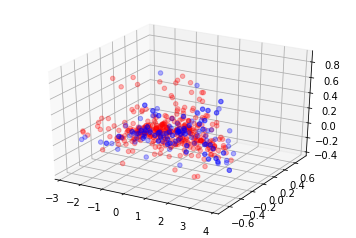

In [68]:
x = train_df[kt_columns]
y = train_df['isSTEM']
x_pca = pca.transform(x)

cdict = {0: 'red', 1: 'blue'}

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# For each set of style and range settings, plot n random points in the box
# defined by x in [23, 32], y in [0, 100], z in [zlow, zhigh].
for g in np.unique(y):
    ix = np.where(y == g)
    xs = x_pca[ix, 0]
    ys = x_pca[ix, 1]
    zs = x_pca[ix, 2]
    ax.scatter(xs, ys, zs, c=cdict[g], alpha=0.3, label=g)

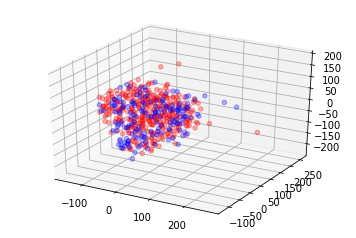

In [90]:
x = train_df[kt_columns]
y = train_df['isSTEM']
x_pca = pca.transform(x)

cdict = {0: 'red', 1: 'blue'}

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# For each set of style and range settings, plot n random points in the box
# defined by x in [23, 32], y in [0, 100], z in [zlow, zhigh].
for g in np.unique(y):
    ix = np.where(y == g)
    xs = x_tsne[ix, 0]
    ys = x_tsne[ix, 1]
    zs = x_tsne[ix, 2]
    ax.scatter(xs, ys, zs, c=cdict[g], alpha=0.3, label=g)

In [86]:
import plotly.plotly as py
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.graph_objs as go
init_notebook_mode(connected=True)

ix = np.where(y == 0)
trace1 = go.Scatter3d(
    x=x_pca[ix, 0][0],
    y=x_pca[ix, 1][0],
    z=x_pca[ix, 2][0],
    mode='markers',
    marker=dict(
        color='rgb(0, 0, 0)',
        size=5,
        opacity=0.2
    ),
    name='non-STEM'
)

ix = np.where(y == 1)
trace2 = go.Scatter3d(
    x=x_pca[ix, 0][0],
    y=x_pca[ix, 1][0],
    z=x_pca[ix, 2][0],
    mode='markers',
    marker=dict(
        color='rgb(255, 0, 0)',
        size=5,
        symbol='circle',
        opacity=0.5
    ),
    name='STEM'
)

data = [trace1, trace2]
fig = go.Figure(data=data)
iplot(fig)

In [91]:
import plotly.plotly as py
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.graph_objs as go
init_notebook_mode(connected=True)

ix = np.where(y == 0)
trace1 = go.Scatter3d(
    x=x_tsne[ix, 0][0],
    y=x_tsne[ix, 1][0],
    z=x_tsne[ix, 2][0],
    mode='markers',
    marker=dict(
        color='rgb(0, 0, 0)',
        size=5,
        opacity=0.2
    ),
    name='non-STEM'
)

ix = np.where(y == 1)
trace2 = go.Scatter3d(
    x=x_tsne[ix, 0][0],
    y=x_tsne[ix, 1][0],
    z=x_tsne[ix, 2][0],
    mode='markers',
    marker=dict(
        color='rgb(255, 0, 0)',
        size=5,
        symbol='circle',
        opacity=0.5
    ),
    name='STEM'
)

data = [trace1, trace2]
fig = go.Figure(data=data)
iplot(fig)

In [ ]:
import matplotlib
matplotlib.__version__

In [ ]:
for row in dkt_df[['skill_id', 'skill']].drop_duplicates().iterrows():
    print(row[1].values)

In [ ]:
target_ix = student_df[['ITEST_id','actionId','Ln','skill']].sort_values('actionId').duplicated(['ITEST_id', 'skill'], keep='last')
bkt_df = student_df[['ITEST_id','actionId','Ln','skill']].sort_values('actionId')[~target_ix]
bkt_df = bkt_df.pivot(index='ITEST_id', columns='skill', values='Ln')
bkt_df['ITEST_id'] = bkt_df.index
bkt_df = bkt_df.merge(right=training_label_df, how='right', on='ITEST_id')
bkt_df.index = bkt_df['ITEST_id']

In [ ]:
bkt_df

In [ ]:
bkt_df[kt_columns] = bkt_df[kt_columns].astype('float32').apply(lambda row: row.fillna(row.mean()), axis=1)

In [ ]:
kt_columns = list(skill_df.skill.values)
columns = kt_columns + ['isSTEM']
kt_correlation_bkt = bkt_df[columns].astype(dtype='float32').corr()['isSTEM'].sort_values(ascending=False)

In [ ]:
from scipy import stats
x = bkt_df['equation-solving'].astype('float32').values
y = bkt_df['isSTEM'].values
stats.pointbiserialr(x,y)

In [ ]:
kt_correlation_bkt

In [ ]:
kt_corr = pd.concat([kt_correlation_bkt, kt_correlation_dkt, kt_correlation_dktp], axis=1)
kt_corr = kt_corr.drop('isSTEM')
kt_corr.columns = ['BKT', 'DKT', 'DKT+']

In [ ]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 

plt.figure(figsize=(25, 1))

df = kt_corr.transpose()
df.columns = range(len(df.columns))
mask = df.isnull()
cmap = plt.cm.RdBu
cmap.set_bad('#b0b0b0',1.)
plt.title('Corr. between the skill and "isSTEM" label')
plot = sns.heatmap(df, mask=mask, cmap=cmap, vmax=0.3, vmin=-0.3)

In [ ]:
figure = plot.get_figure()
figure.savefig('dkt_vs_dktp.pdf', bbox_inches='tight')#, bbox_extra_artist=[lgd])

In [ ]:
df = kt_corr.transpose()
df.columns = range(len(df.columns))

column_1 = df.columns[0:51]
column_2 = df.columns[51:102]

df1 = df[column_1]
df2 = df[column_2]

fig = plt.figure(figsize=(10, 2.5))
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)

fig.tight_layout()


sns.heatmap(df1, cmap=cmap, ax=ax1, vmax=0.3, vmin=-0.3)
sns.heatmap(df2, cmap=cmap, ax=ax2, vmax=0.3, vmin=-0.3)
plt.savefig('dkt_vs_dktp_correlation.pdf', bbox_inches='tight')

In [ ]:
bkt_df

In [ ]:
from scipy import stats

In [ ]:
bkt_ttest = []
for column in dkt_df.columns:
    if column in kt_columns:
        bkt_stem = bkt_df[bkt_df.isSTEM == 1][column].astype('float32')
        bkt_nonstem = bkt_df[bkt_df.isSTEM == 0][column].astype('float32')
        
        bkt_ttest.append(stats.ttest_ind(bkt_stem, bkt_nonstem, equal_var=False))

In [ ]:
bkt_t_stat = dict(zip(dkt_df.columns, [tup[0] for tup in bkt_ttest]))

In [ ]:
dktp_ttest = []
dkt_ttest = []
for column in dkt_df.columns:
    if column != 'isSTEM':
        dktp_stem = dktp_df[dktp_df.isSTEM == 1][column]
        dktp_nonstem = dktp_df[dktp_df.isSTEM == 0][column]
        dkt_stem = dkt_df[dkt_df.isSTEM == 1][column]
        dkt_nonstem = dkt_df[dkt_df.isSTEM == 0][column]
        dktp_ttest.append(stats.ttest_ind(dktp_nonstem, dktp_stem, equal_var=False))
        dkt_ttest.append(stats.ttest_ind(dkt_nonstem, dkt_stem, equal_var=False))

In [ ]:
dktp_ttest[0][0], dkt_ttest[0][0]

In [ ]:
dktp_t_stat = dict(zip(dkt_df.columns, [tup[0] for tup in dktp_ttest]))
dkt_t_stat = dict(zip(dkt_df.columns, [tup[0] for tup in dkt_ttest]))

In [ ]:
x = np.array([tup[0] for tup in dktp_ttest])

In [ ]:

skill_rank = np.argsort(np.abs(x))
skill_rank

In [ ]:
id_to_skill

In [ ]:
ttest_df = pd.DataFrame([dkt_t_stat, dktp_t_stat], index=['DKT', 'DKT+'])
ttest_df

In [ ]:
df = ttest_df
# df.columns = range(len(df.columns))

column_1 = df.columns[0:51]
column_2 = df.columns[51:102]

df1 = df[column_1]
df2 = df[column_2]

fig = plt.figure(figsize=(10, 2.5))
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)

fig.tight_layout()

cmap = plt.cm.bwr
cmap.set_bad('#b0b0b0',1.)

sns.heatmap(df1, cmap=cmap, ax=ax1, vmax=4.5, vmin=-4.5)
sns.heatmap(df2, cmap=cmap, ax=ax2, vmax=4.5, vmin=-4.5)
# plt.savefig('dkt_vs_dktp_ttest.pdf', bbox_inches='tight')

In [ ]:
df.iloc[0].abs().nlargest(n=10)

In [ ]:
kt_corr.transpose().columns == ttest_df.columns

In [ ]:
for key, value in dict(zip(range(len(ttest_df.columns)),ttest_df.columns)).items():
    print('{}: {}'.format(key,value))